# Table of Contents
 <p>

In [18]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [19]:
def lin(a,b,x): return a*x+b

In [20]:
a=3.
b=8.

In [21]:
n=30
x = random(n)
y = lin(a,b,x)

In [22]:
x

array([ 0.4584,  0.1531,  0.7996,  0.4395,  0.3032,  0.0386,  0.867 ,  0.6   ,  0.6976,  0.2694,
        0.6291,  0.1843,  0.278 ,  0.9406,  0.1693,  0.9743,  0.3594,  0.1743,  0.5437,  0.7359,
        0.0244,  0.0641,  0.6254,  0.2049,  0.9901,  0.0514,  0.6216,  0.0243,  0.2014,  0.8252])

In [23]:
y

array([  9.3753,   8.4592,  10.3987,   9.3184,   8.9097,   8.1158,  10.601 ,   9.8   ,  10.0927,
         8.8082,   9.8872,   8.5529,   8.8341,  10.8219,   8.508 ,  10.923 ,   9.0783,   8.523 ,
         9.6312,  10.2077,   8.0731,   8.1923,   9.8761,   8.6147,  10.9702,   8.1542,   9.8647,
         8.0729,   8.6042,  10.4757])

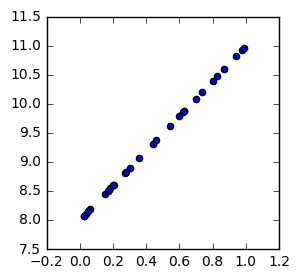

In [24]:
plt.scatter(x,y)

In [25]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [26]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.8535

In [27]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [32]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()
    print(avg_loss(y, a_guess, b_guess, x))
    print(a_guess, b_guess)

In [33]:
for i in range(10): upd()

5.29029100351
0.417040620987 3.91114803222
5.16218690854
0.468179822351 4.01573804957
5.03718978536
0.518097777935 4.11778459959
4.91522438559
0.566824056352 4.21734933779
4.79621728557
0.614387509655 4.31449242544
4.68009684219
0.6608162907 4.40927256576
4.56679314973
0.706137870099 4.50174703922
4.45623799783
0.750379052747 4.5919717381
4.34836483036
0.793565993959 4.68000120007
4.24310870542
0.835724215214 4.76588864104


In [17]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

RuntimeError: No MovieWriters available!